In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

Text(0, 0.5, 'Number of Jobs')

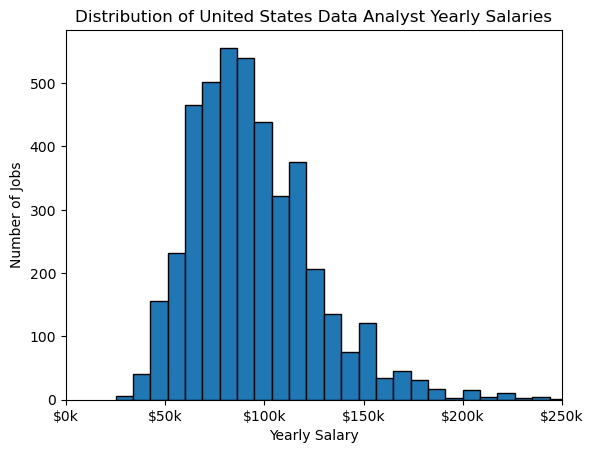

In [10]:
df_DA_US.salary_year_avg.plot(kind='hist', bins=40, edgecolor='black')

plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

Problems

In [11]:
df_DS = df[df['job_title_short']=='Data Scientist']

Text(0, 0.5, 'Number of Jobs')

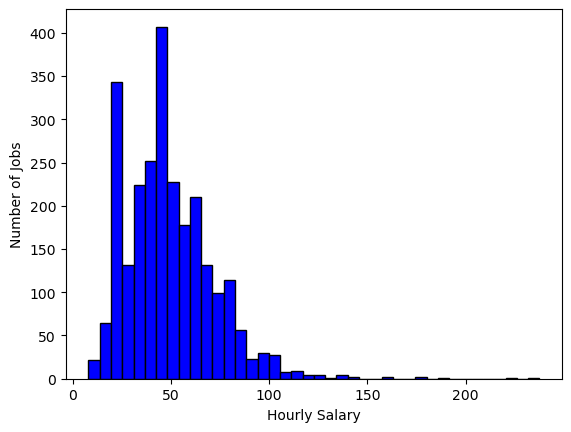

In [16]:
df_DS.salary_hour_avg.plot(kind='hist', bins=40, color='blue', edgecolor='black')

plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')

In [3]:
df_skills = df.dropna(subset=['job_skills']).copy()
df_skills['num_skills'] = df_skills.job_skills.apply(len)


Text(0, 0.5, 'Number of Job Postings')

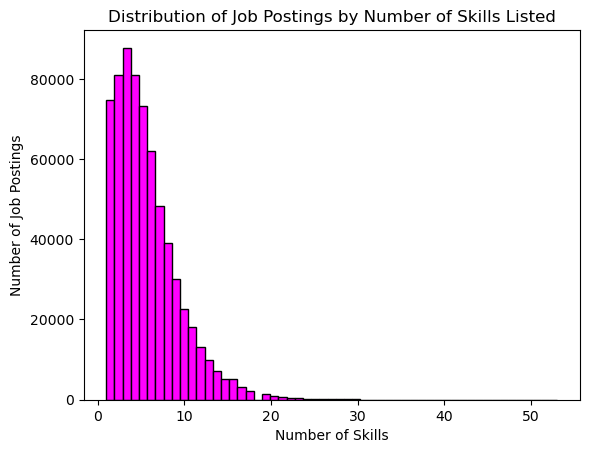

In [6]:
df_skills.num_skills.plot(kind='hist', bins=55, color='magenta', edgecolor='black')

plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')

In [19]:
df_DE = df[df['job_title_short']=='Data Engineer'].copy()
df_DE = df_DE.dropna(subset=['salary_year_avg'])
mean_salary = df_DE.salary_year_avg.mean()
median_salary = df_DE.salary_year_avg.median()

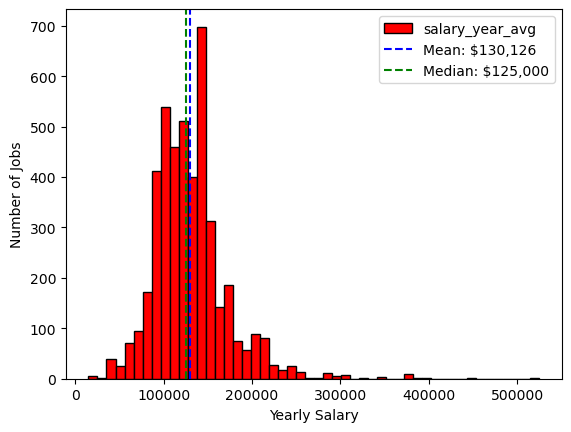

In [21]:
df_DE.salary_year_avg.plot(kind='hist', bins=50, color='red', edgecolor='black')

plt.axvline(mean_salary, color='blue', linestyle='--', label= f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='--', label= f'Median: ${median_salary:,.0f}')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.legend()
plt.show()